In [1]:
import setup

In [2]:
import qiskit
import matplotlib
import matplotlib.pyplot as plt
from circuit import QCircuit
from algo.func_optimizer import BfgsOptimizer, CmaesOptimizer
from algo.one_plus_lambda import OnePlusLambda, EvolutionReport, IterationReport
from iohelper import hamiltonians, results as rio
from circuit import QCircuit, GateTypes, QCircuitConversions
from algo.vqe import Vqe
from mutations import Weighted, Insert, Remove, add_two_block_layers

Iteration #0. Time: 24s. Evaluations: 1924.
  Values: [-0.9103352552171818]
  New value!


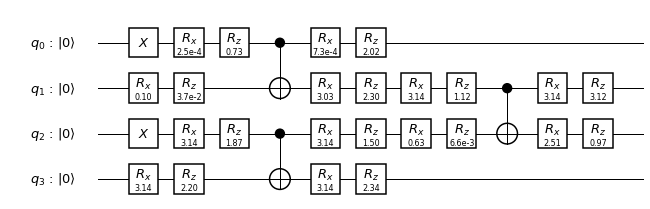

Iteration #1. Time: 67s. Evaluations: 11760.
  Values: [-0.9713698106684987, -0.9713678135958539, -0.9103167220863969, -0.91023543436344]
  New value!


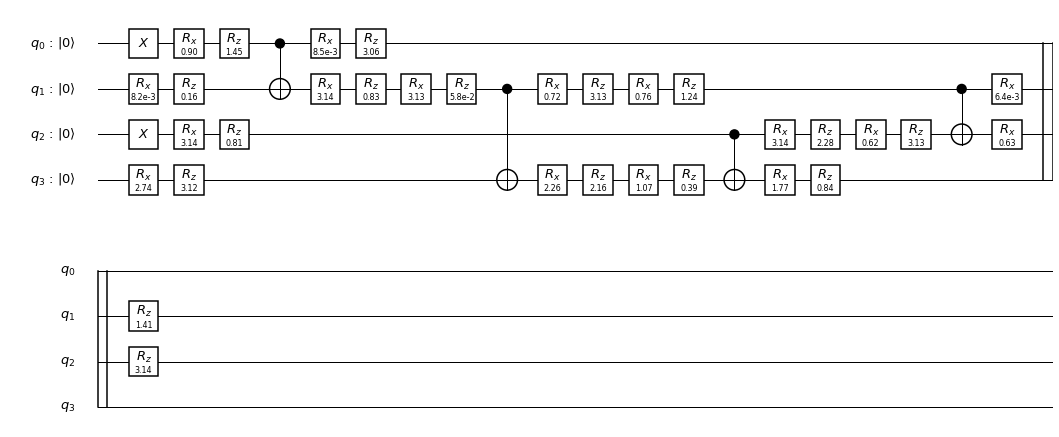

CALCULATIONS FINISHED SUCCESSFULLY


In [32]:
def show_history(report: EvolutionReport):
    for iteration in report.iterations:
        num_evaluations = sum(m.num_circ_evaluations for m in iteration.mutations)
        print('Iteration #{}. Time: {:.0f}s. Evaluations: {}.'.format(iteration.index, iteration.time, num_evaluations))
        print('  Values: {}'.format([m.value for m in iteration.mutations]))
        if iteration.better:
            print('  New value!')
            display(QCircuitConversions.to_qiskit_circuit(iteration.mutations[0].circ).draw(output='mpl'))
    if report.interrupted:
        print('CALCULATIONS WAS INTERRUPTED')
    else:
        print('CALCULATIONS FINISHED SUCCESSFULLY')

show_history(rio.load('reports', 'h2_1.7'))

In [45]:
import numpy as np

rs = ['{:.1f}'.format(r) for r in np.arange(0.5, 2.6, 0.1)]
tasks = ['H2', 'LiH'] + ['h2_{}'.format(r) for r in rs]
results = [rio.load('reports', t) for t in tasks]
results2 = [rio.load('reports', t + '_swap') for t in tasks]

Iteration #0. Time: 4s. Evaluations: 900.
  Values: [-1.1449588078236557]
  New value!


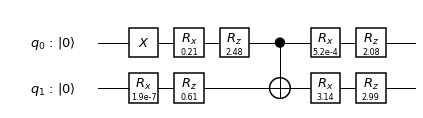

CALCULATIONS FINISHED SUCCESSFULLY


In [37]:
show_history(results[0])

[1, 9, 5, 6, 6, 4, 4, 4, 6, 4, 4, 6, 5, 4, 4, 5, 5, 7, 4, 5, 7, 4, 3]


(array([1., 0., 1., 9., 0., 5., 4., 2., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

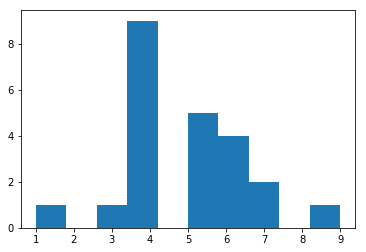

In [60]:
num_blocks = [r.best_circuit.size for r in results]
print(num_blocks)
plt.hist(num_blocks)

[1, 9, 4, 6, 3, 6, 4, 6, 6, 7, 4, 5, 6, 4, 5, 4, 4, 4, 8, 5, 6, 6, 7]


(array([1., 0., 1., 7., 0., 3., 7., 2., 1., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

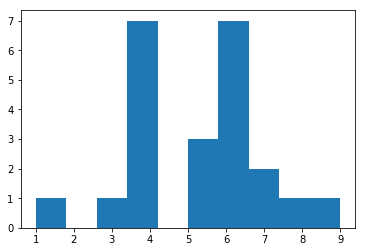

In [59]:
num_blocks = [r.best_circuit.size for r in results2]
print(num_blocks)
plt.hist(num_blocks)

[900, 227861, 85945, 79871, 53715, 14186, 59286, 86401, 45985, 11353, 45619, 44016, 47801, 12363, 13684, 24941, 39017, 106894, 10027, 23334, 128615, 24831, 19543]
402.63155518407405


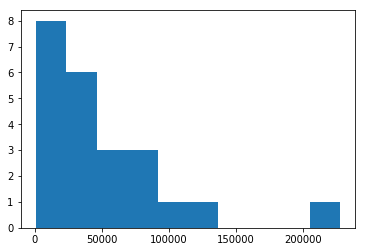

In [53]:
n_evaluations = [sum(m.num_circ_evaluations for i in r.iterations for m in i.mutations) for r in results]
print(n_evaluations)
plt.hist(n_evaluations)

avg_time = sum(i.time for r in results for i in r.iterations)  / len(results)
print(avg_time)

[1, 9, 5, 6, 6, 4, 4, 4, 6, 4, 4, 6, 5, 4, 4, 5, 5, 7, 4, 5, 7, 4, 3]


(array([1., 0., 1., 9., 0., 5., 4., 2., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

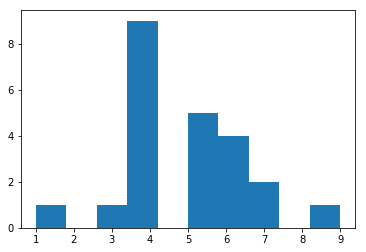

In [43]:
best_circuit_size = [r.best_circuit.size for r in results]
print(best_circuit_size)
plt.hist(best_circuit_size)